In [13]:
from src.utils.PathManager import Paths as Path 
import pandas as pd 
import numpy as np 
import yaml 
import matplotlib.pyplot as plt 

In [3]:
with open(Path.config("nearest_station.yaml"), 'r') as file:
    station_dict = yaml.safe_load(file)

In [4]:
station_dict

{'ACRUS1': 'Jackson',
 'BIGL22': 'Moomba',
 'MOOM115': 'Moomba',
 'POND1': 'Tirrawarra',
 'POND11': 'Tirrawarra',
 'POND14': 'Tirrawarra',
 'POND16': 'Tirrawarra',
 'PSYC3': 'Jackson',
 'PSYC7': 'Jackson',
 'TIRRA80': 'Tirrawarra',
 'TIRRA88': 'Tirrawarra',
 'TIRRA91': 'Tirrawarra',
 'TIRRA93': 'Tirrawarra',
 'TIRRW1': 'Tirrawarra',
 'TOOL29': 'Epsilon',
 'WELTN1': 'Jackson',
 'WIPPOS1': 'Woomanooka',
 'WKT3': 'Woomanooka',
 'YAN1L': 'Woomanooka',
 'YAN2L': 'Woomanooka',
 'YAN2U': 'Woomanooka',
 'YAN4U': 'Woomanooka',
 'YAN8L': 'Woomanooka'}

In [47]:
Tirrawarra_df = pd.read_csv(Path.data("Tirrawarra_weather.csv"), index_col="TS", parse_dates=["TS"])

In [48]:
Tirrawarra_df.head()

,temperature_2m,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,relativehumidity_2m,rain
TS,,,,,,,,,,,
2018-01-01 00:00:00,34.0,11.0,0.0,19.0,0.0,608.0,321.0,287.0,444.8,NaN,NaN
2018-01-01 01:00:00,35.6,59.0,0.0,89.0,18.0,677.0,327.0,350.0,380.1,NaN,NaN
2018-01-01 02:00:00,35.6,80.0,0.0,98.0,69.0,579.0,177.0,402.0,185.8,NaN,NaN
2018-01-01 03:00:00,34.4,88.0,0.0,100.0,94.0,247.0,8.0,239.0,8.1,NaN,NaN
2018-01-01 04:00:00,32.7,89.0,0.0,99.0,99.0,210.0,0.0,210.0,0.0,NaN,NaN


In [45]:
TIRRA80_df = pd.read_csv(Path.data("TIRRA80_raw.csv"), index_col="TS", parse_dates=['TS'])

In [46]:
TIRRA80_df.head()

,ROC_VOLTAGE,FLOW,PRESSURE_TH,Mask_ROC_VOLTAGE,Mask_FLOW,Mask_PRESSURE_TH
TS,,,,,,
2016-06-29 05:11:00,28.982571,13.64587,1402.734375,1,1,1
2016-06-29 05:12:00,28.975559,13.48393,1402.525513,1,1,1
2016-06-29 05:13:00,28.965811,13.18543,1405.447021,1,1,1
2016-06-29 05:14:00,28.967501,13.18915,1415.884033,1,0,1
2016-06-29 05:15:00,28.973089,13.19287,1415.988647,1,1,1


In [ ]:
Tirrawarra_df.loc["2018-01-01":"2018-01-02",:]

In [55]:
import matplotlib.pyplot as plt 
import pandas as pd 
from datetime import timedelta 

colour_dict = {0:'gold',
               1:'orchid',
               2:'navy',
               3:'salmon',
               4:'red', 
               5:'darkred',
               6:'wheat', 
               7:'yellowgreen',
               8:'mediumvioletred',
               9:'aqua'}

weather_color_dict ={
    "cloudcover":'dodgerblue',
    "cloudcover_low":'lightskyblue',
    "cloudcover_mid":'deepskyblue',
    "cloudcover_high":'steelblue',
    "shortwave_radiation":'beige',
    "direct_radiation":'lawngreen',
    "diffuse_radiation":'hotpink',
    "direct_normal_irradiance":'peru'
}

def plot_label(ax: plt.axes, ax_id:int, label:pd.Series, start:str=None, end:str=None):
    #Slice dataframe based on start and end 
    if start is None and end is None:
        label_df = label
    elif start is None and end is not None:
        label_df = label.loc[:end]
    elif start is not None and end is None:
        label_df = label.loc[start:]
    else:
        label_df = label.loc[start:end]
        
    #Overlaying label columns
    for i in range(len(label_df)):
        x_start = label_df.index[i]
        x_end = x_start + timedelta(days=1)
        colour = colour_dict[label_df[i]]
        ax[ax_id].axvspan(x_start, x_end, ymin=0, ymax=1, color=colour, alpha = 0.5)
        
def plot_data(ax: plt.Axes, ax_id:int, df:pd.Series, start:str=None, end:str=None, yticks=None, color:str='g', set_ylabel:bool=False):
    #Slice dataframe based on start and end 
    if start is None and end is None:
        plot_df = df
    elif start is None and end is not None:
        plot_df = df.loc[:end]
    elif start is not None and end is None:
        plot_df = df.loc[start:]
    else:
        plot_df = df.loc[start:end]
        
    #Plot overlaying features 
    ax[ax_id].scatter(plot_df.index, plot_df.values, c = color, s=5, marker='.', label=plot_df.name)
    ax[ax_id].grid()
    if yticks is not None:
        ax[ax_id].set_yticks(yticks)
    if set_ylabel:
        ax[ax_id].set_ylabel(plot_df.name)
    ax[ax_id].legend()
    
def plot_ROC(raw_df, well_name, weather_df=None, label_df=None, start=None, end=None, 
                    raw_features:list=["ROC_VOLTAGE","FLOW","PRESSURE_TH"],
                    weather_features:list = ["cloudcover", "cloudcover_low", "cloudcover_mid", "cloudcover_high"]):

    fig, ax = plt.subplots(len(raw_features), figsize=(50,35), sharex=True)
    for idx, feature in enumerate(raw_features):
        plot_data(ax, idx, raw_df[feature], start, end)
        if label_df is not None:
            plot_label(ax,idx,label_df, start, end)
        if weather_df is not None:
            for weather_feature in weather_features:
                plot_data(ax, idx, weather_df[weather_feature], start, end, color=weather_color_dict[weather_feature])
        
    # handleList = [plt.plot([], marker="o", ls="", color=color)[0] for color in colour_dict.values()]

    legend = plt.legend(loc='right')
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 1, 0.1))
    fig.suptitle(f'{well_name}',fontsize=96)
    plt.xlabel("TS")
    

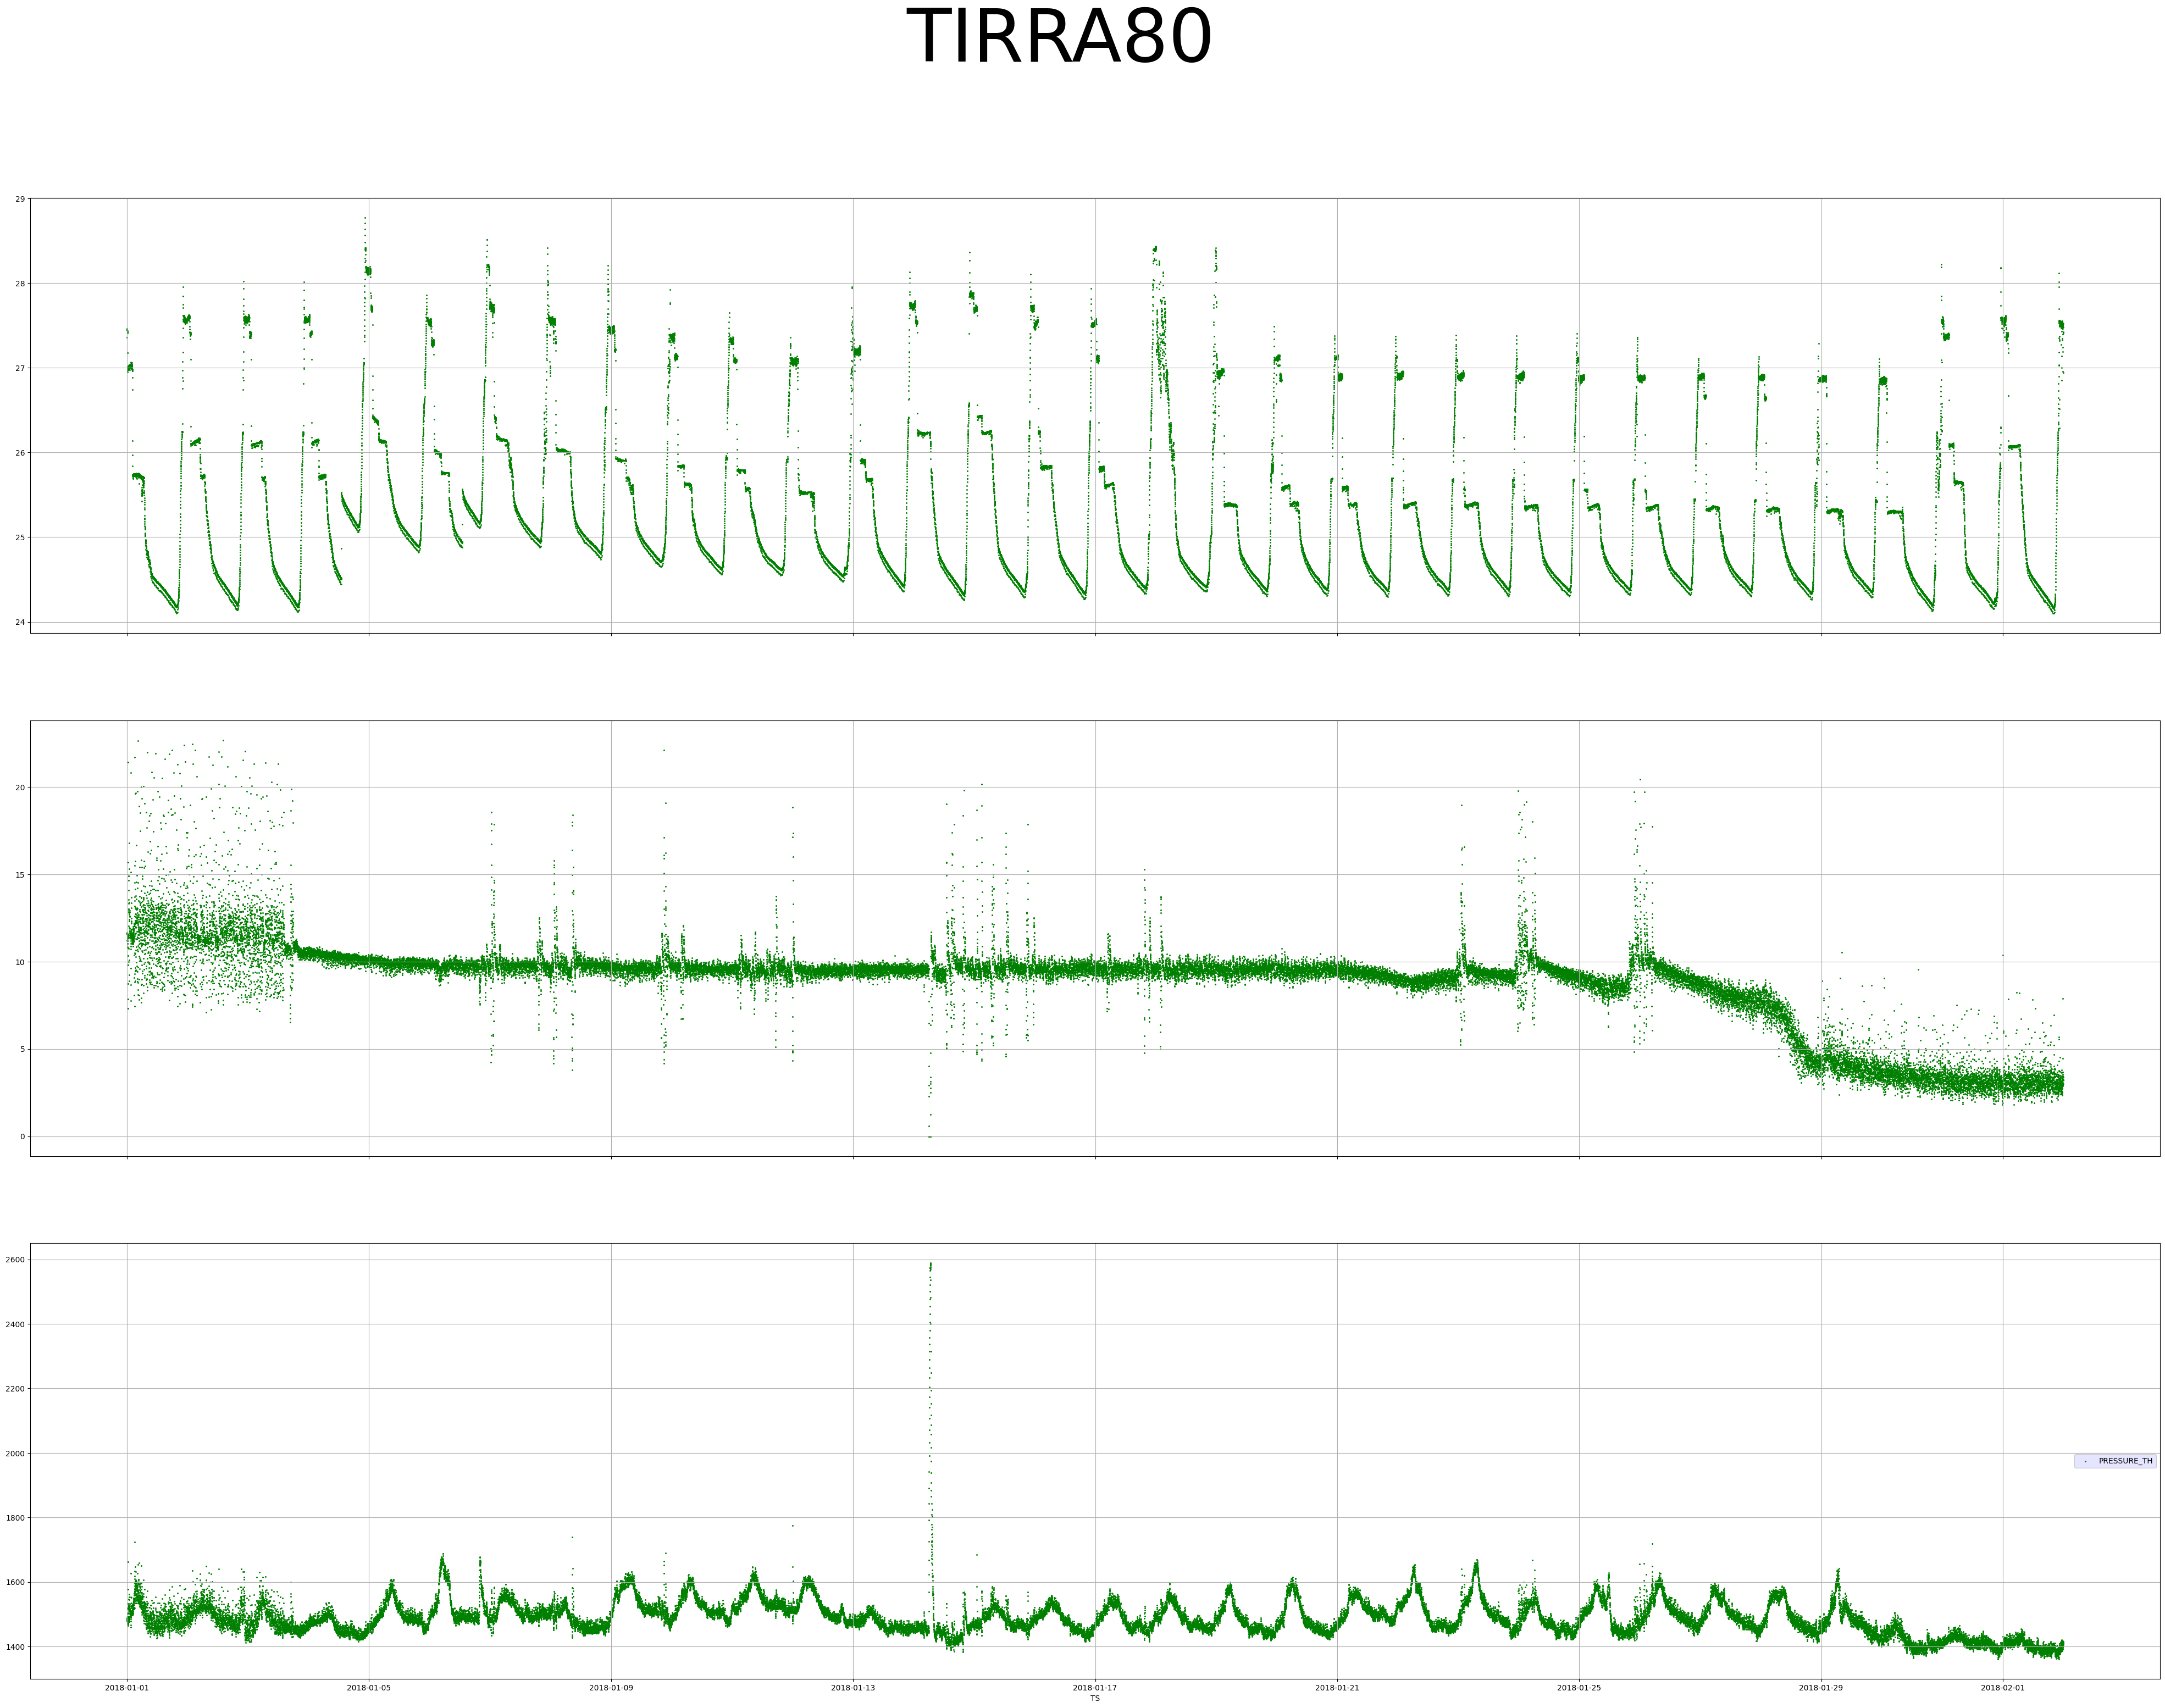

In [56]:
plot_ROC(TIRRA80_df, "TIRRA80", start="2018-01-01", end="2018-02-01")

In [52]:
TIRRA80_df

,ROC_VOLTAGE,FLOW,PRESSURE_TH,Mask_ROC_VOLTAGE,Mask_FLOW,Mask_PRESSURE_TH
TS,,,,,,
2016-06-29 05:11:00,28.982571,13.645870,1402.734375,1,1,1
2016-06-29 05:12:00,28.975559,13.483930,1402.525513,1,1,1
2016-06-29 05:13:00,28.965811,13.185430,1405.447021,1,1,1
2016-06-29 05:14:00,28.967501,13.189150,1415.884033,1,0,1
2016-06-29 05:15:00,28.973089,13.192870,1415.988647,1,1,1
...,...,...,...,...,...,...
2022-07-11 01:36:00,30.458700,8.260595,1015.028442,0,0,1
2022-07-11 01:37:00,30.458700,8.439660,1018.785461,0,1,1
2022-07-11 01:38:00,30.458700,8.215310,1017.533142,0,1,1
